# CASE STUDY EQUITY VANILLA OPTION

Case study for Hyderabad Conference December 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.equity import *
from financepy.market.curves import *

####################################################################
# FINANCEPY BETA Version 0.187 - This build:  02 Dec 2020 at 20:12 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Creating the Equity Vanilla Call Option

We need to set up the option details - what you would find in the Term Sheet.

In [3]:
expiryDate = FinDate(1, 6, 2021)

In [4]:
strikePrice = 100.0

We now create the option object

In [5]:
callOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)

In [6]:
print(callOption)

OBJECT TYPE: FinEquityVanillaOption
EXPIRY DATE: 01-JUN-2021
STRIKE PRICE: 100.0
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
NUMBER: 1.0


## Valuation

To do a valuation we need to specify the date and set the market inputs

In [7]:
valueDate = FinDate(6, 12, 2020)

In [8]:
stockPrice = 90.0

In [9]:
dividendYield = 0.01

In [10]:
interestRate = 0.02

In [11]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.ANNUAL)

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [14]:
volatility = 0.20
model = FinModelBlackScholes(volatility)

The valuation is as follows

In [15]:
callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

1.801680685204456

### Spot Price Dependency

We can examine how the option value depends on the spot price

In [16]:
stockPrices = np.linspace(60,140,100)
values = callOption.value(valueDate, stockPrices, discountCurve, dividendYield, model)

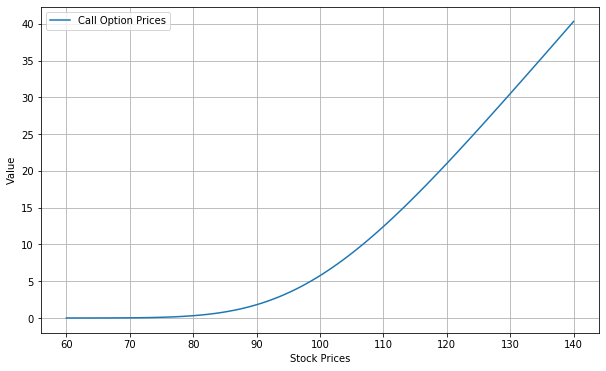

In [17]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices,values, label="Call Option Prices")
plt.xlabel("Stock Prices")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Volatility Dependency

We can see how the value depends on volatility

In [18]:
volatilities = np.linspace(0.01,10,100)
models = FinModelBlackScholes(volatilities)
values = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, models)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(volatilities*100,values, label="Option Prices")
plt.xlabel("Volatility (%)")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Strike Price Dependency

Also strikes. 

In [ ]:
strikePrices = np.linspace(70,130,50)

But as these are part of the option description - so we need to first vectorise those.

In [ ]:
callOptions = FinEquityVanillaOption(expiryDate, strikePrices, FinOptionTypes.EUROPEAN_CALL)

Look, we have an array of callOptions with different strikes

In [ ]:
callOptions._strikePrice

Then we can get back a vector of values

In [ ]:
callValues = callOptions.value(valueDate, stockPrice, discountCurve, dividendYield, model)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(strikePrices, callValues, label="CALL Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Risk Sensitivities

In [ ]:
callDeltas = callOption.delta(valueDate, stockPrices, discountCurve, dividendYield, model)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callDeltas, label="CALL Delta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [ ]:
callGammas = callOption.gamma(valueDate, stockPrices, discountCurve, dividendYield, model)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callGammas, label="CALL Gamma")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [ ]:
callVegas = callOption.vega(valueDate, stockPrices, discountCurve, dividendYield, model)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callVegas, label="CALL Vega")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [ ]:
callThetas = callOption.theta(valueDate, stockPrices, discountCurve, dividendYield, model)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callThetas, label="CALL Theta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Copyright (c) 2020, Dominic O'Kane 